In [40]:
import pandas as pd
import numpy as np
import src.generation.gamma as ga
import src.generation.multivariate_normal as mn
from src.generation.base.generator import BaseGenerator

import matplotlib.pyplot as plt

from tqdm import tqdm

In [41]:
def calc(wrapper, cor: float, seed:float = None):
    generator = wrapper(cor, seed)
    vectors = generator.generate_cloud_load_vectors()
    cm = np.corrcoef(vectors)
    # return cm[cm != 1]
    return np.mean(cm[cm != 1]), np.sum(vectors)

In [42]:
def run_tests(wrapper, cor_rng = np.arange(0, 1.01, 0.05), repeats=100):
    result = []

    sed = 0
    for cor in cor_rng:
        for _ in range(repeats):
            cr, ld= calc(wrapper, cor, sed)

            result.append((cor, cr, ld))
            sed += 1

    return pd.DataFrame(result, columns=['expected', 'actual', 'load'])

In [43]:
# params
N = 1000
F = N
size=100

In [44]:
def gamma_wrapper(cor: float, seed: float=None) -> BaseGenerator:
    # return ga.Generator(F, size, cor, (4,8), seed=seed)
    return ga.Generator(F, size, cor, (6,6), seed=seed)

def mn2_wrapper(cor: float, seed: float=None) -> BaseGenerator:
    # return mn.Generator2(F, size, cor, (8,16), (1,2), seed=seed)
    return mn.Generator2(F, size, cor, (12,12), (2,2), seed=seed)

def mn_wrapper(cor: float, seed: float=None) -> BaseGenerator:
    # return mn.Generator(F, size, cor, (8,16), (1,2), seed=seed)
    return mn.Generator(F, size, cor, (12,12), (2,2), seed=seed)

# Time performance

In [45]:
%%timeit
fg = gamma_wrapper(0)

20 ms ± 1.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [46]:
%%timeit
fg = gamma_wrapper(0)
fg.generate_cloud_load_vectors()

37.8 ms ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [47]:
%%timeit
fm = mn_wrapper(0)

4.96 ms ± 725 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [48]:
%%timeit
fm = mn_wrapper(0)
fm.generate_cloud_load_vectors()

699 ms ± 23.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [49]:
%%timeit
fm2 = mn2_wrapper(0)

24.7 ms ± 2.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [50]:
%%timeit
fm2 = mn2_wrapper(0)
fm2.generate_cloud_load_vectors()

34.7 ms ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Tests

In [51]:
%%time
df_ga = run_tests(gamma_wrapper)

CPU times: user 10min 28s, sys: 9min 25s, total: 19min 53s
Wall time: 2min 45s


In [52]:
%%time
df_mn = run_tests(mn_wrapper, repeats=50)

CPU times: user 57min 40s, sys: 31min 55s, total: 1h 29min 36s
Wall time: 12min 36s


In [53]:
%%time
df_mn2 = run_tests(mn2_wrapper)

CPU times: user 10min 17s, sys: 9min 2s, total: 19min 20s
Wall time: 2min 38s


In [54]:
# df_ga.to_csv('results/gamma-gen-100.csv', index=False)
# df_mn.to_csv('results/gamma-nor-100.csv', index=False)
# df_mn2.to_csv('results/gamma-nor2-100.csv', index=False)

# Plots

In [55]:
grped = df_ga.groupby('expected').agg({'actual': ['mean', 'count', 'std'], 'load': ['median', 'mean', 'count', 'std']})
mnped = df_mn.groupby('expected').agg({'actual': ['mean', 'count', 'std'], 'load': ['median', 'mean', 'count', 'std']})
mnped2 = df_mn2.groupby('expected').agg({'actual': ['mean', 'count', 'std'], 'load': ['median', 'mean', 'count', 'std']})

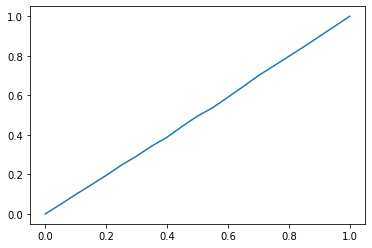

In [56]:
plt.plot(grped.index, grped.actual['mean'])
plt.show()

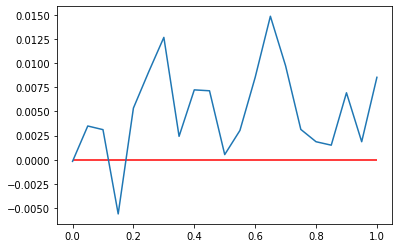

In [57]:
line = gamma_wrapper(0).get_estimated_cloud_load()
plt.plot(grped.index, (grped.load['median']-line)/line)
plt.hlines(0, 0, 1, colors="red")
plt.show()

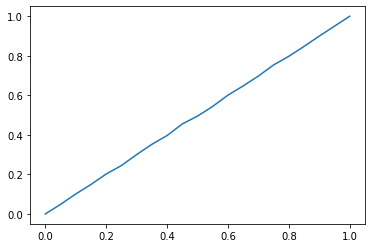

In [58]:
plt.plot(mnped.index, mnped.actual['mean'])
plt.show()

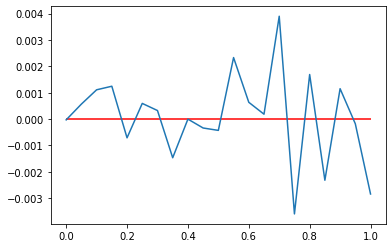

In [59]:
line = mn_wrapper(0).get_estimated_cloud_load()
plt.plot(mnped.index, (mnped.load['median']-line)/line)
plt.hlines(0, 0, 1, colors="red")
plt.show()

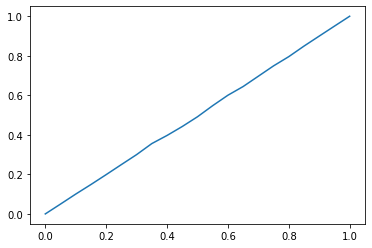

In [60]:
plt.plot(mnped2.index, mnped2.actual['mean'])
plt.show()

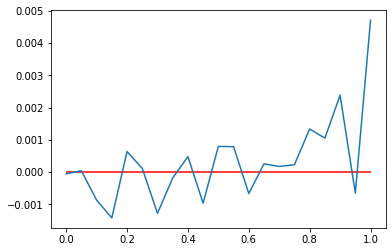

In [61]:
line = mn2_wrapper(0).get_estimated_cloud_load()
plt.plot(mnped2.index, (mnped2.load['median']-line)/line)
plt.hlines(0, 0, 1, colors="red")
plt.show()

In [62]:
grped

actual                              load                      \
              mean count           std        median          mean count   
expected                                                                   
0.00      0.000274   100  1.601120e-04  1.199793e+06  1.199705e+06   100   
0.05      0.048655   100  6.513775e-03  1.204182e+06  1.203869e+06   100   
0.10      0.098550   100  1.258791e-02  1.203729e+06  1.200458e+06   100   
0.15      0.146127   100  1.796729e-02  1.193270e+06  1.194836e+06   100   
0.20      0.195226   100  2.342837e-02  1.206406e+06  1.206497e+06   100   
0.25      0.246909   100  2.765207e-02  1.210884e+06  1.207968e+06   100   
0.30      0.292841   100  2.969465e-02  1.215180e+06  1.214786e+06   100   
0.35      0.343823   100  3.854566e-02  1.202899e+06  1.207391e+06   100   
0.40      0.388029   100  3.609858e-02  1.208667e+06  1.206282e+06   100   
0.45      0.443435   100  4.690288e-02  1.208552e+06  1.209304e+06   100   
0.50      0.494945   100  4.276365e-02  1.200634e+06  1.204437e+06   100   
0.55      0.537373   100  4.834614e-02  1.203633e+06  1.210385e+06   100   
0.60      0.590397   100  3.930743e-02  1.210210e+06  1.214583e+06   100   
0.65      0.644065   100  4.582377e-02  1.217804e+06  1.214226e+06   100   
0.70      0.699552   100  4.812100e-02  1.211648e+06  1.214382e+06   100   
0.75      0.748109   100  3.639886e-02  1.203758e+06  1.210442e+06   100   
0.80      0.797149   100  3.291360e-02  1.202229e+06  1.199343e+06   100   
0.85      0.846345   100  2.508996e-02  1.201802e+06  1.206293e+06   100   
0.90      0.897502   100  1.885499e-02  1.208305e+06  1.208447e+06   100   
0.95      0.948171   100  1.127814e-02  1.202229e+06  1.197328e+06   100   
1.00      1.000000   100  2.381805e-09  1.210226e+06  1.199575e+06   100   

                        
                   std  
expected                
0.00       2766.287376  
0.05      17356.166927  
0.10      27224.337445  
0.15      30696.968665  
0.20      33596.947422  
0.25      37522.769168  
0.30      42420.085918  
0.35      46297.404095  
0.40      50685.483155  
0.45      52067.606822  
0.50      53815.354486  
0.55      63549.122753  
0.60      56301.571364  
0.65      69996.691111  
0.70      71118.086488  
0.75      75199.517531  
0.80      79970.781913  
0.85      71810.502694  
0.90      82591.650237  
0.95      85069.184364  
1.00      89576.973208

In [63]:
mnped

actual                              load                      \
              mean count           std        median          mean count   
expected                                                                   
0.00      0.000257    50  1.371918e-04  1.199966e+06  1.199974e+06    50   
0.05      0.048331    50  6.313893e-03  1.200683e+06  1.200480e+06    50   
0.10      0.100987    50  1.392710e-02  1.201334e+06  1.200583e+06    50   
0.15      0.149181    50  1.734764e-02  1.201496e+06  1.200678e+06    50   
0.20      0.201958    50  1.910470e-02  1.199149e+06  1.200026e+06    50   
0.25      0.244902    50  2.303025e-02  1.200715e+06  1.200837e+06    50   
0.30      0.300222    50  3.212202e-02  1.200391e+06  1.201308e+06    50   
0.35      0.352099    50  3.130469e-02  1.198243e+06  1.200077e+06    50   
0.40      0.396441    50  3.186643e-02  1.200000e+06  1.200514e+06    50   
0.45      0.455146    50  3.872439e-02  1.199596e+06  1.199573e+06    50   
0.50      0.494919    50  3.786512e-02  1.199487e+06  1.198928e+06    50   
0.55      0.544008    50  3.210014e-02  1.202800e+06  1.200415e+06    50   
0.60      0.600908    50  3.264665e-02  1.200765e+06  1.200749e+06    50   
0.65      0.647506    50  3.570024e-02  1.200224e+06  1.198478e+06    50   
0.70      0.697394    50  3.093321e-02  1.204680e+06  1.206058e+06    50   
0.75      0.753610    50  2.543692e-02  1.195687e+06  1.197384e+06    50   
0.80      0.797291    50  2.280790e-02  1.202029e+06  1.200191e+06    50   
0.85      0.847273    50  1.900377e-02  1.197219e+06  1.196961e+06    50   
0.90      0.899420    50  1.268911e-02  1.201384e+06  1.201771e+06    50   
0.95      0.949581    50  7.701795e-03  1.199788e+06  1.199265e+06    50   
1.00      1.000000    50  4.885505e-14  1.196594e+06  1.196694e+06    50   

                        
                   std  
expected                
0.00        548.128010  
0.05       4362.622303  
0.10       5497.956727  
0.15       6493.168661  
0.20      10250.117650  
0.25       6903.697658  
0.30      11075.349077  
0.35      10791.215855  
0.40      13988.651215  
0.45      13012.384604  
0.50      13410.352679  
0.55      15655.934637  
0.60      15962.488461  
0.65      19091.983213  
0.70      16338.803354  
0.75      17741.937997  
0.80      17482.085622  
0.85      19370.933522  
0.90      19048.852635  
0.95      20169.295048  
1.00      18163.730054

In [64]:
mnped2

actual                              load                      \
              mean count           std        median          mean count   
expected                                                                   
0.00      0.000272   100  1.469132e-04  1.199940e+06  1.199988e+06   100   
0.05      0.050091   100  6.911192e-03  1.200053e+06  1.199729e+06   100   
0.10      0.100600   100  1.333376e-02  1.198962e+06  1.199455e+06   100   
0.15      0.148991   100  1.739517e-02  1.198298e+06  1.199068e+06   100   
0.20      0.198957   100  2.350266e-02  1.200770e+06  1.199900e+06   100   
0.25      0.249825   100  2.775989e-02  1.200142e+06  1.200793e+06   100   
0.30      0.300168   100  2.726599e-02  1.198470e+06  1.199111e+06   100   
0.35      0.356015   100  3.471224e-02  1.199784e+06  1.199641e+06   100   
0.40      0.397082   100  4.221458e-02  1.200580e+06  1.201134e+06   100   
0.45      0.442346   100  3.900500e-02  1.198848e+06  1.200297e+06   100   
0.50      0.491584   100  3.936358e-02  1.200960e+06  1.199788e+06   100   
0.55      0.547808   100  3.476277e-02  1.200949e+06  1.200421e+06   100   
0.60      0.600537   100  3.201135e-02  1.199206e+06  1.200167e+06   100   
0.65      0.644523   100  3.299177e-02  1.200310e+06  1.200839e+06   100   
0.70      0.696758   100  2.804309e-02  1.200213e+06  1.199719e+06   100   
0.75      0.749015   100  2.644478e-02  1.200279e+06  1.199887e+06   100   
0.80      0.795719   100  2.459724e-02  1.201609e+06  1.201105e+06   100   
0.85      0.849066   100  1.679269e-02  1.201268e+06  1.198570e+06   100   
0.90      0.899636   100  1.304563e-02  1.202866e+06  1.199872e+06   100   
0.95      0.949960   100  7.246807e-03  1.199224e+06  1.200147e+06   100   
1.00      1.000000   100  1.509759e-09  1.205656e+06  1.203362e+06   100   

                        
                   std  
expected                
0.00        637.231033  
0.05       4479.724348  
0.10       6737.093490  
0.15       6725.252168  
0.20       8687.766459  
0.25      11051.211868  
0.30      11430.649316  
0.35      11314.377184  
0.40      12241.082568  
0.45      13825.558280  
0.50      12289.404445  
0.55      12888.753785  
0.60      14585.604709  
0.65      15076.294465  
0.70      16402.906635  
0.75      17561.785545  
0.80      16795.924179  
0.85      20130.653534  
0.90      17533.580372  
0.95      20703.766785  
1.00      17869.741716